In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import seaborn as sns
from tensorflow.keras.callbacks import TensorBoard
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [2]:
n = 5
i1 = n - 1
i2 = n + 29
i3 = n + 59

In [3]:
data_dir = 'D:/NN_labs/lab4/101_food_classes_10_percent/train/'
classes = sorted(os.listdir(data_dir))
selected_classes = [classes[i1], classes[i2], classes[i3]]
classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [4]:
train_data = []
test_data = []

for cls in selected_classes:
    cls_path = os.path.join(data_dir, cls)
    cls_images = [os.path.join(cls, img) for img in os.listdir(cls_path)]
    train, test = train_test_split(cls_images, test_size=0.2, random_state=42)
    train_data.extend([(cls, img) for img in train])
    test_data.extend([(cls, img) for img in test])

train_df = pd.DataFrame(train_data, columns=['class', 'image'])
test_df = pd.DataFrame(test_data, columns=['class', 'image'])

In [5]:
train_df.head()

,class,image
0,beef_tartare,beef_tartare\1969924.jpg
1,beef_tartare,beef_tartare\1141816.jpg
2,beef_tartare,beef_tartare\2425516.jpg
3,beef_tartare,beef_tartare\3623899.jpg
4,beef_tartare,beef_tartare\492181.jpg


In [6]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(train_df, directory=data_dir, x_col='image', y_col='class', target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_generator = test_datagen.flow_from_dataframe(test_df, directory=data_dir, x_col='image', y_col='class', target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 180 validated image filenames belonging to 3 classes.
Found 45 validated image filenames belonging to 3 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*img_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(612, activation='relu'),
    Dense(3, activation='softmax')])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.fit(
train_generator,
epochs=10,
steps_per_epoch = int(np.ceil(len(train_generator)/float(batch_size))),
validation_data = test_generator,
validation_steps = int(np.ceil(len(train_generator)/float(batch_size))), callbacks=[tensorboard_callback])

Epoch 1/10
1/1 [==============================] - 110s 110s/step - loss: 1.1032 - accuracy: 0.2812 - val_loss: 5.1427 - val_accuracy: 0.4688
Epoch 2/10
1/1 [==============================] - 130s 130s/step - loss: 8.7171 - accuracy: 0.2500 - val_loss: 7.1980 - val_accuracy: 0.4688
Epoch 3/10
1/1 [==============================] - 145s 145s/step - loss: 9.8980 - accuracy: 0.2812 - val_loss: 3.3601 - val_accuracy: 0.4688
Epoch 4/10
1/1 [==============================] - 156s 156s/step - loss: 3.2605 - accuracy: 0.3125 - val_loss: 2.0708 - val_accuracy: 0.0625
Epoch 5/10
1/1 [==============================] - 134s 134s/step - loss: 1.4926 - accuracy: 0.4062 - val_loss: 1.6883 - val_accuracy: 0.0625
Epoch 6/10
1/1 [==============================] - 122s 122s/step - loss: 1.2103 - accuracy: 0.4062 - val_loss: 1.3161 - val_accuracy: 0.0625
Epoch 7/10
1/1 [==============================] - 170s 170s/step - loss: 1.1233 - accuracy: 0.2500 - val_loss: 1.1739 - val_accuracy: 0.3438
Epoch 8/10
1/

In [9]:
loss, accuracy = model.evaluate(test_generator, verbose=0)
print('Test loss: ', round(loss, 2))
print('Test accuracy: ', round(accuracy, 2))

Test loss:  1.06
Test accuracy:  0.33


In [10]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers

# Побудова моделі ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(*img_size, 3))

# Додавання верхніх шарів
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(64, activation='relu')(x)
predictions = layers.Dense(3, activation='softmax')(x)

model_1_2 = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# Заморожуємо базову модель
for layer in base_model.layers:
    layer.trainable = False

# Компіляція моделі
model_1_2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Навчання моделі
model_1_2.fit(train_generator, epochs=10, callbacks=[tensorboard_callback])

Epoch 1/10


C:\Users\Misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


6/6 [==============================] - 18s 3s/step - loss: 1.2387 - accuracy: 0.3222
Epoch 2/10
6/6 [==============================] - 16s 3s/step - loss: 1.1034 - accuracy: 0.3500
Epoch 3/10
6/6 [==============================] - 16s 3s/step - loss: 1.0994 - accuracy: 0.3500
Epoch 4/10
6/6 [==============================] - 16s 3s/step - loss: 1.0771 - accuracy: 0.3556
Epoch 5/10
6/6 [==============================] - 16s 3s/step - loss: 1.0669 - accuracy: 0.4222
Epoch 6/10
6/6 [==============================] - 17s 3s/step - loss: 1.0467 - accuracy: 0.4389
Epoch 7/10
6/6 [==============================] - 15s 3s/step - loss: 1.0377 - accuracy: 0.5056
Epoch 8/10
6/6 [==============================] - 14s 2s/step - loss: 1.0312 - accuracy: 0.5000
Epoch 9/10
6/6 [==============================] - 14s 2s/step - loss: 1.0290 - accuracy: 0.4333
Epoch 10/10
6/6 [==============================] - 15s 3s/step - loss: 1.0231 - accuracy: 0.4667


In [11]:
loss, accuracy = model_1_2.evaluate(test_generator, verbose=0)
print('Test loss: ', round(loss, 2))
print('Test accuracy: ', round(accuracy, 2))

Test loss:  1.02
Test accuracy:  0.44


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers

# Побудова моделі EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Додавання верхніх шарів
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(64, activation='relu')(x)
predictions = layers.Dense(3, activation='softmax')(x)

model_1_3 = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# Компіляція моделі
model_1_3.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Навчання моделі
model_1_3.fit(train_generator, epochs=10,callbacks=[tensorboard_callback])
loss, accuracy = model_1_3.evaluate(test_generator, verbose=0)
print('Test loss: ', round(loss, 2))
print('Test accuracy: ', round(accuracy, 2))

Epoch 1/10
6/6 [==============================] - 46s 5s/step - loss: 0.7765 - accuracy: 0.6722
Epoch 2/10
6/6 [==============================] - 31s 5s/step - loss: 0.2333 - accuracy: 0.9389
Epoch 3/10
6/6 [==============================] - 30s 5s/step - loss: 0.0997 - accuracy: 0.9556
Epoch 4/10
6/6 [==============================] - 31s 6s/step - loss: 0.0454 - accuracy: 0.9833
Epoch 5/10
6/6 [==============================] - 41s 7s/step - loss: 0.0363 - accuracy: 0.9778
Epoch 6/10
6/6 [==============================] - 59s 10s/step - loss: 0.0430 - accuracy: 0.9889
Epoch 7/10
6/6 [==============================] - 50s 8s/step - loss: 0.0505 - accuracy: 0.9778
Epoch 8/10
6/6 [==============================] - 51s 9s/step - loss: 0.0295 - accuracy: 0.9944
Epoch 9/10
6/6 [==============================] - 52s 9s/step - loss: 0.1265 - accuracy: 0.9611
Epoch 10/10
6/6 [==============================] - 41s 7s/step - loss: 0.0418 - accuracy: 0.9889
Test loss:  4.39
Test accuracy:  0.33


In [13]:
# ... код побудови моделей 1.2 та 1.3

# Компіляція моделей з оптимізатором SGD
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

model_1_2.compile(optimizer=sgd_optimizer,
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_1_3.compile(optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.001, momentum=0.9),
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

# Навчання моделей
model_1_2.fit(train_generator, epochs=10)
loss, accuracy = model_1_2.evaluate(test_generator, verbose=0, callbacks=[tensorboard_callback])
print('Test loss: ', round(loss, 2))
print('Test accuracy: ', round(accuracy, 2))
model_1_3.fit(train_generator, epochs=10)
loss, accuracy = model_1_3.evaluate(test_generator, verbose=0, callbacks=[tensorboard_callback])
print('Test loss: ', round(loss, 2))
print('Test accuracy: ', round(accuracy, 2))

Epoch 1/10
6/6 [==============================] - 18s 2s/step - loss: 1.0165 - accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 14s 2s/step - loss: 1.0325 - accuracy: 0.4278
Epoch 3/10
6/6 [==============================] - 15s 2s/step - loss: 1.0854 - accuracy: 0.3444
Epoch 4/10
6/6 [==============================] - 20s 3s/step - loss: 1.0202 - accuracy: 0.4667
Epoch 5/10
6/6 [==============================] - 19s 3s/step - loss: 1.0284 - accuracy: 0.4722
Epoch 6/10
6/6 [==============================] - 17s 3s/step - loss: 1.0635 - accuracy: 0.3722
Epoch 7/10
6/6 [==============================] - 18s 3s/step - loss: 1.0399 - accuracy: 0.4611
Epoch 8/10
6/6 [==============================] - 18s 3s/step - loss: 1.0268 - accuracy: 0.4333
Epoch 9/10
6/6 [==============================] - 18s 3s/step - loss: 1.0364 - accuracy: 0.4556
Epoch 10/10
6/6 [==============================] - 19s 3s/step - loss: 1.0307 - accuracy: 0.4667
Test loss:  1.01
Test accuracy:  0.51
E

In [14]:
model_1_3.compile(optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.001, momentum=0.9),
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
model_1_3.fit(train_generator, epochs=10, callbacks=[tensorboard_callback])
loss, accuracy = model_1_3.evaluate(test_generator, verbose=0)
print('Test loss: ', round(loss, 2))
print('Test accuracy: ', round(accuracy, 2))

Epoch 1/10
6/6 [==============================] - 56s 7s/step - loss: 0.0415 - accuracy: 0.9778
Epoch 2/10
6/6 [==============================] - 33s 6s/step - loss: 0.0140 - accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 32s 5s/step - loss: 0.0311 - accuracy: 0.9889
Epoch 4/10
6/6 [==============================] - 32s 5s/step - loss: 0.0240 - accuracy: 0.9889
Epoch 5/10
6/6 [==============================] - 31s 5s/step - loss: 0.0262 - accuracy: 0.9889
Epoch 6/10
6/6 [==============================] - 31s 6s/step - loss: 0.0623 - accuracy: 0.9889
Epoch 7/10
6/6 [==============================] - 34s 6s/step - loss: 0.0416 - accuracy: 0.9833
Epoch 8/10
6/6 [==============================] - 31s 5s/step - loss: 0.0441 - accuracy: 0.9889
Epoch 9/10
6/6 [==============================] - 31s 5s/step - loss: 0.0933 - accuracy: 0.9611
Epoch 10/10
6/6 [==============================] - 31s 5s/step - loss: 0.0403 - accuracy: 0.9833
Test loss:  1.55
Test accuracy:  0.33


In [15]:
# ... код побудови моделей 1.2 та 1.3

# Розморожуємо останні 10 шарів
for layer in model_1_2.layers[-10:]:
    layer.trainable = True

for layer in model_1_3.layers[-10:]:
    layer.trainable = True

# Компіляція моделей
model_1_2.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_1_3.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

# Навчання моделей
model_1_2.fit(train_generator, epochs=10, callbacks=[tensorboard_callback])
loss, accuracy = model_1_2.evaluate(test_generator, verbose=0)
print('Test loss: ', round(loss, 2))
print('Test accuracy: ', round(accuracy, 2))
model_1_3.fit(train_generator, epochs=10, callbacks=[tensorboard_callback])
loss, accuracy = model_1_3.evaluate(test_generator, verbose=0)
print('Test loss: ', round(loss, 2))
print('Test accuracy: ', round(accuracy, 2))

Epoch 1/10
6/6 [==============================] - 19s 3s/step - loss: 1.2506 - accuracy: 0.3833
Epoch 2/10
6/6 [==============================] - 16s 3s/step - loss: 1.0312 - accuracy: 0.4667
Epoch 3/10
6/6 [==============================] - 15s 3s/step - loss: 0.9525 - accuracy: 0.4778
Epoch 4/10
6/6 [==============================] - 16s 3s/step - loss: 0.9352 - accuracy: 0.5444
Epoch 5/10
6/6 [==============================] - 16s 3s/step - loss: 0.9596 - accuracy: 0.4889
Epoch 6/10
6/6 [==============================] - 15s 3s/step - loss: 0.9026 - accuracy: 0.5389
Epoch 7/10
6/6 [==============================] - 15s 3s/step - loss: 0.8555 - accuracy: 0.5889
Epoch 8/10
6/6 [==============================] - 15s 3s/step - loss: 0.8313 - accuracy: 0.5444
Epoch 9/10
6/6 [==============================] - 16s 3s/step - loss: 0.8453 - accuracy: 0.5944
Epoch 10/10
6/6 [==============================] - 16s 3s/step - loss: 0.8236 - accuracy: 0.6000
Test loss:  1.66
Test accuracy:  0.53
E

Після оброки команди !tensorboard --logdir logs/fit і відкриття посилання у сусідньому вікні було отримана велика кількість графіків, ось приклади деяких з них

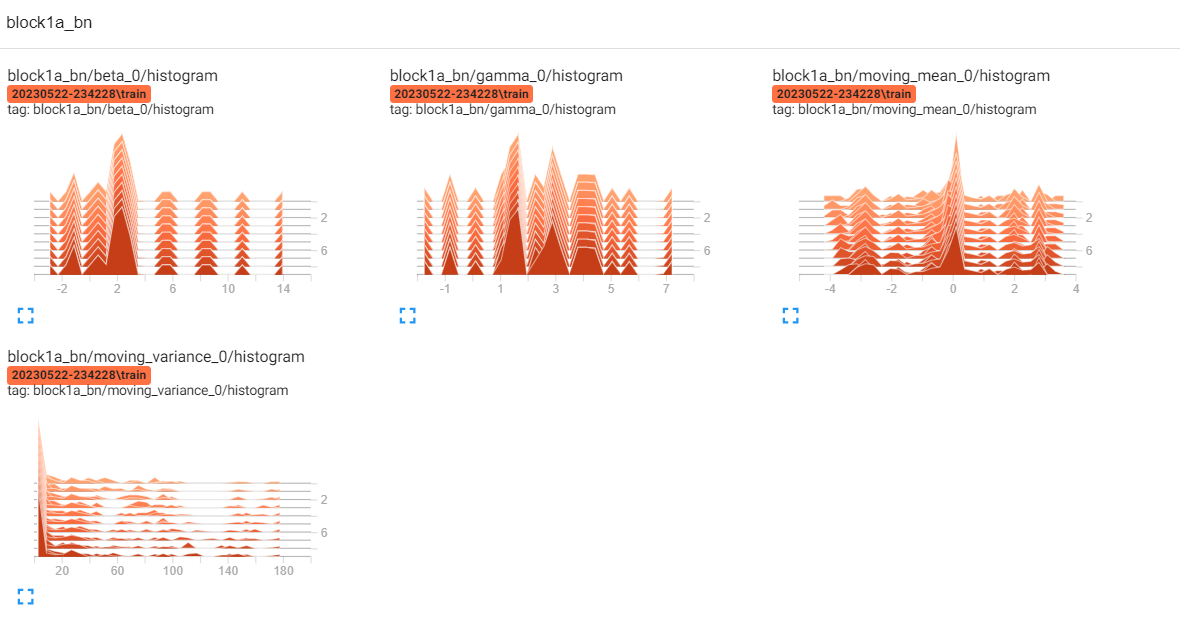
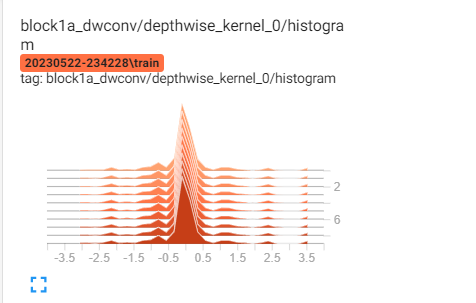